# Meesho Exploratory Data Analysis 

**Dataset Overview:**
The dataset titled "Meesho Forward Reports" contains transactional records detailing orders placed through the Meesho platform. This data includes key attributes such as order date, sub-order number, order status, state, pin code, GST amount, price details, and shipping charges. The dataset is intended to provide insights into order patterns, revenue distribution, and logistics performance.

**Project Objective:**
The primary objective of this project is to leverage data analysis techniques to uncover actionable insights that can help improve Meesho’s operational efficiency and business growth. By performing exploratory data analysis (EDA) using Python and SQL, we aim to:

1)Understand order trends and performance metrics.

2)Identify key challenges, such as high cancellation or RTO rates.

3)Suggest recommendations to optimize revenue generation, shipping logistics, and GST compliance.

# Import Libraries and Load the Dataset

In [75]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\rabik\OneDrive\Desktop\TCS\meesho ForwardReports.csv'  # Update this with your file path
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,order_date,sub_order_num,order_status,state,pin,gst_amount,meesho_price,shipping_charges_total,price
0,2022-08-30,381809810413_1,Shipped,Jammu & Kashmir,180006,66.68,1400,121,1521
1,2022-08-10,940712900368_1,rto,Uttar Pradesh,208014,69.58,1461,114,1575
2,2022-08-03,322259568161_1,Delivered,Telangana,509001,64.30,1350,108,1440
3,2022-08-27,475133679575_1,Cancelled,Jammu & Kashmir,182101,98.96,2078,0,2078
4,2022-08-04,493966375185_1,rto,Odisha,760001,64.30,1350,108,1458


# Data Cleaning Processes

In [77]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing key information
df = df.dropna(subset=['sub_order_num', 'order_status'])

# Fill numeric missing values with mean 
df['gst_amount'] = df['gst_amount'].fillna(df['gst_amount'].mean())


order_date                0
sub_order_num             0
order_status              0
state                     0
pin                       0
gst_amount                0
meesho_price              0
shipping_charges_total    0
price                     0
dtype: int64


# Validate Data Types:

In [79]:
# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Ensure numeric columns are numeric
numeric_columns = ['gst_amount', 'meesho_price', 'price', 'shipping_charges_total']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


# Handle Duplicates:

In [81]:
# Drop duplicate rows
df = df.drop_duplicates()


# Remove Unwanted Data:

In [83]:
# Remove rows with negative or zero values in key columns
df = df[df['price'] > 0]


# Standardize Categorical Columns:



In [85]:
# Convert 'order_status' to lowercase
df['order_status'] = df['order_status'].str.lower()


# Final Cleaned Data

In [87]:
# Save cleaned data to a new file (optional)
df.to_csv('cleaned_meesho_forward_reports.csv', index=False)


In [89]:
df.head()

,order_date,sub_order_num,order_status,state,pin,gst_amount,meesho_price,shipping_charges_total,price
0,2022-08-30,381809810413_1,shipped,Jammu & Kashmir,180006,66.68,1400,121,1521
1,2022-08-10,940712900368_1,rto,Uttar Pradesh,208014,69.58,1461,114,1575
2,2022-08-03,322259568161_1,delivered,Telangana,509001,64.30,1350,108,1440
3,2022-08-27,475133679575_1,cancelled,Jammu & Kashmir,182101,98.96,2078,0,2078
4,2022-08-04,493966375185_1,rto,Odisha,760001,64.30,1350,108,1458


# Exploratory Data Analysis

In [138]:
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


# Create an SQLite in-memory database
conn = sqlite3.connect(':memory:')
df.to_sql('meesho_forward_reports', conn, index=False, if_exists='replace')

# Verify the data is loaded
pd.read_sql("SELECT * FROM meesho_forward_reports LIMIT 5;", conn)


,order_date,sub_order_num,order_status,state,pin,gst_amount,meesho_price,shipping_charges_total,price
0,2022-08-30 00:00:00,381809810413_1,shipped,Jammu & Kashmir,180006,66.68,1400,121,1521
1,2022-08-10 00:00:00,940712900368_1,rto,Uttar Pradesh,208014,69.58,1461,114,1575
2,2022-08-03 00:00:00,322259568161_1,delivered,Telangana,509001,64.30,1350,108,1440
3,2022-08-27 00:00:00,475133679575_1,cancelled,Jammu & Kashmir,182101,98.96,2078,0,2078
4,2022-08-04 00:00:00,493966375185_1,rto,Odisha,760001,64.30,1350,108,1458


# State-Wise Profitability Analysis

           state  total_profit
0        Gujarat        7655.0
1    West Bengal        6047.0
2         Punjab        5530.0
3         Odisha        5512.0
4  Uttar Pradesh        5236.0
5      Telangana        4587.0
6     Tamil Nadu        4583.0
7    Maharashtra        3403.0
8      Karnataka        3401.0
9      Rajasthan        3023.0


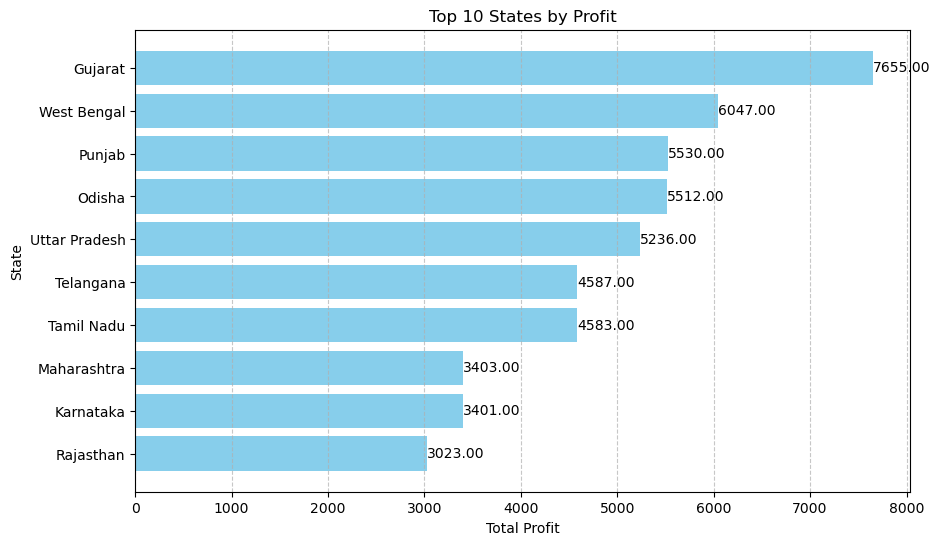

In [120]:
# Query for state-wise profitability
query = """
    SELECT 
        state, 
        ROUND(SUM(price - shipping_charges_total), 2) AS total_profit
    FROM meesho_forward_reports
    WHERE order_status = 'delivered'
    GROUP BY state
    ORDER BY total_profit DESC
    LIMIT 10;
"""
profitability_data = pd.read_sql(query, conn)
print(profitability_data)

# Horizontal Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.barh(profitability_data['state'], profitability_data['total_profit'], color='skyblue')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.title('Top 10 States by Profit')

# Annotate bar values
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Monthly Revenue Trends

  month_year  total_revenue
0    2022-07           2256
1    2022-08          63404


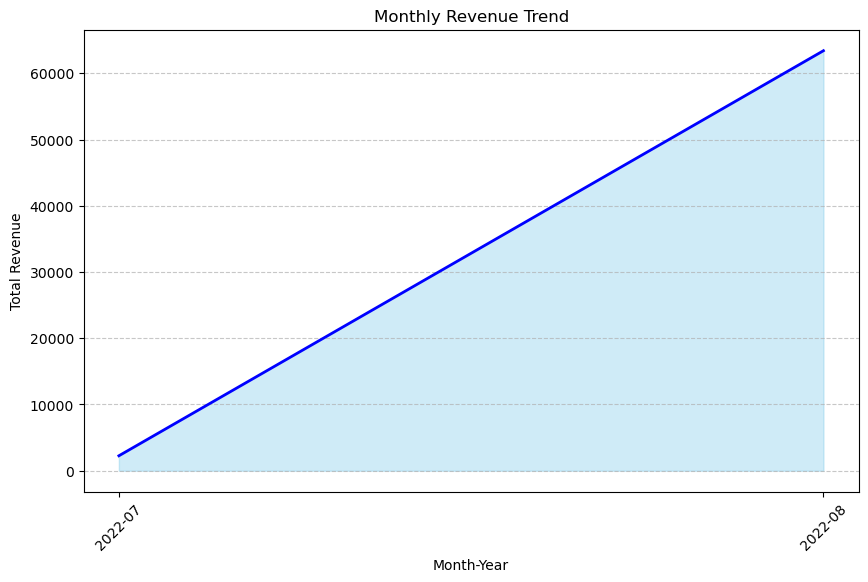

In [127]:
# Query for monthly revenue trend
query = """
    SELECT 
        STRFTIME('%Y-%m', order_date) AS month_year, 
        SUM(price) AS total_revenue
    FROM meesho_forward_reports
    WHERE order_status = 'delivered'
    GROUP BY month_year
    ORDER BY month_year ASC;
"""
monthly_revenue = pd.read_sql(query, conn)
print(monthly_revenue)

# Area Chart
plt.figure(figsize=(10, 6))
plt.fill_between(monthly_revenue['month_year'], monthly_revenue['total_revenue'], color='skyblue', alpha=0.4)
plt.plot(monthly_revenue['month_year'], monthly_revenue['total_revenue'], color='blue', linewidth=2)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Cancellation Rate:

            state  total_orders  cancelled_orders
0   Uttar Pradesh            11                 0
1      Tamil Nadu            10                 1
2     West Bengal             9                 1
3       Telangana             9                 0
4  Madhya Pradesh             8                 1
5          Kerala             8                 0
6         Gujarat             8                 0
7  Andhra Pradesh             8                 0
8          Odisha             7                 0
9     Maharashtra             6                 0


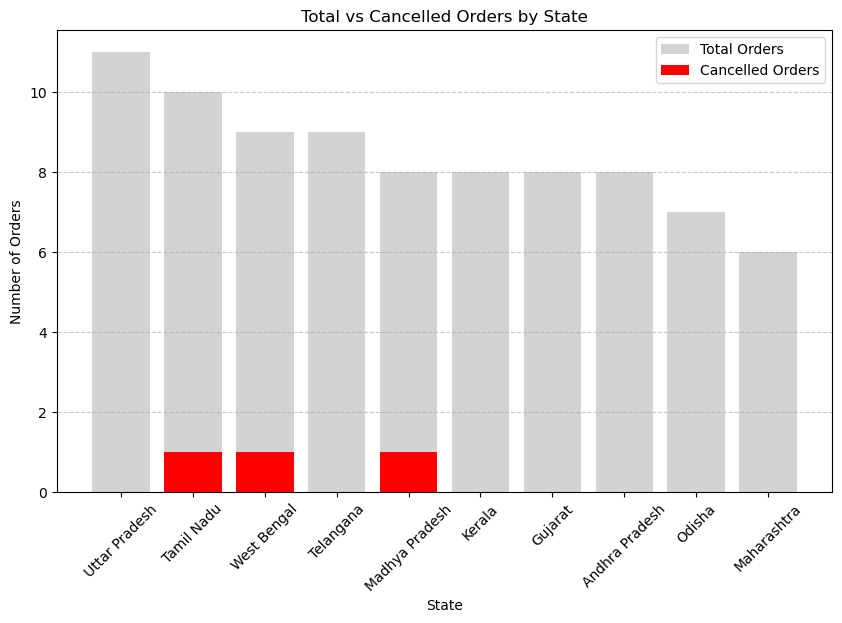

In [132]:
# Query for cancellation rates
query = """
    SELECT 
        state, 
        COUNT(*) AS total_orders,
        SUM(CASE WHEN order_status = 'cancelled' THEN 1 ELSE 0 END) AS cancelled_orders
    FROM meesho_forward_reports
    GROUP BY state
    ORDER BY total_orders DESC
    LIMIT 10;
"""
cancellation_data = pd.read_sql(query, conn)
print(cancellation_data)

# Stacked Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(cancellation_data['state'], cancellation_data['total_orders'], label='Total Orders', color='lightgray')
plt.bar(cancellation_data['state'], cancellation_data['cancelled_orders'], label='Cancelled Orders', color='red')
plt.title('Total vs Cancelled Orders by State')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Shipping Charges Analysis: 

     shipping_charges_total order_status
0                       121      shipped
1                       114          rto
2                       108    delivered
3                         0    cancelled
4                       108          rto
..                      ...          ...
133                     110      shipped
134                     114       return
135                     110          rto
136                       0          rto
137                       0    delivered

[138 rows x 2 columns]


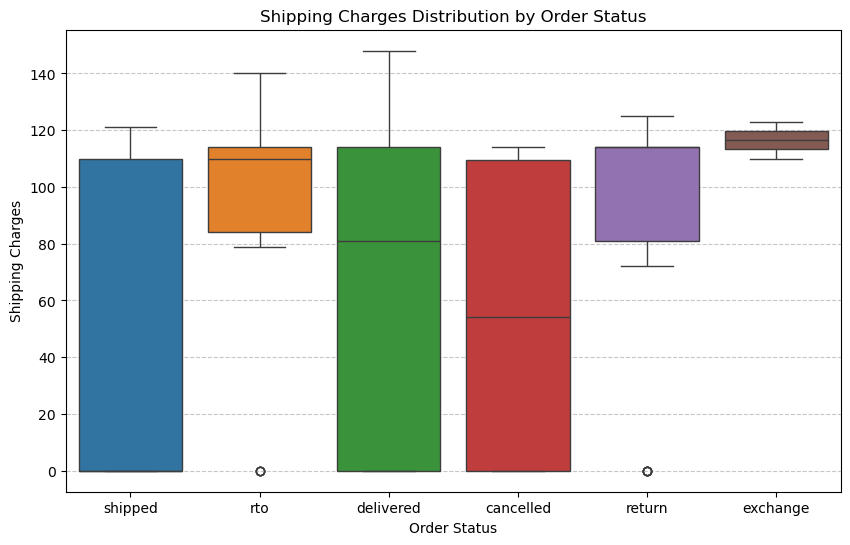

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Query for shipping cost analysis
shipping_query = """
    SELECT 
        shipping_charges_total, 
        order_status
    FROM meesho_forward_reports;
"""
shipping_data = pd.read_sql(shipping_query, conn)
print (shipping_data)

# Box Plot with hue
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='order_status',
    y='shipping_charges_total',
    hue='order_status',  # Set hue to 'order_status'
    data=shipping_data,
    dodge=False,  # Ensure a single box per category
    legend=False  # Remove redundant legend
)
plt.title('Shipping Charges Distribution by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Shipping Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#  GST Anomaly Detection

      sub_order_num  price  gst_amount  gst_percentage
0    265339595628_1    526       26.14            4.97
1    237419587792_1    526       26.14            4.97
2    397474434265_1    480       23.76            4.95
3    264002870509_1    703       34.68            4.93
4    707632123402_1    535       26.14            4.89
..              ...    ...         ...             ...
132  447323391939_1   1640       71.44            4.36
133  640125783153_1   1648       71.44            4.33
134  736602256273_1   1648       71.44            4.33
135  736602256273_2   1648       71.44            4.33
136  528661643961_1    829       35.72            4.31

[137 rows x 4 columns]


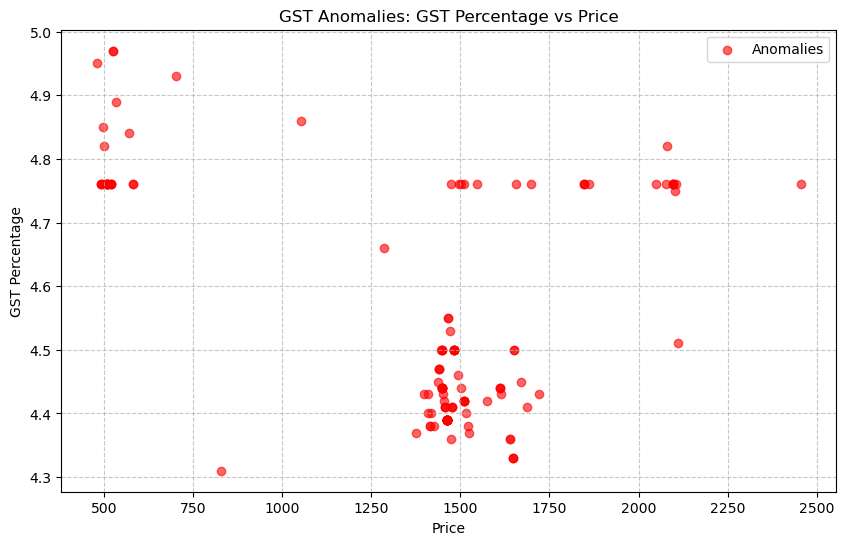

In [176]:
# Corrected Query for GST anomalies
query = """
    SELECT 
        sub_order_num, 
        price, 
        gst_amount, 
        ROUND((gst_amount * 100.0) / price, 2) AS gst_percentage
    FROM meesho_forward_reports
    WHERE gst_amount > 0 
        AND (ROUND((gst_amount * 100.0) / price, 2) > 18 
        OR ROUND((gst_amount * 100.0) / price, 2) < 5)
    ORDER BY gst_percentage DESC;
"""
gst_anomalies = pd.read_sql(query, conn)
print(gst_anomalies)

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(gst_anomalies['price'], gst_anomalies['gst_percentage'], c='red', alpha=0.6, label='Anomalies')
plt.title('GST Anomalies: GST Percentage vs Price')
plt.xlabel('Price')
plt.ylabel('GST Percentage')
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


# Peak Order Days

  order_hour day_of_week  total_orders
0         00      Sunday            19
1         00      Monday            24
2         00     Tuesday            24
3         00   Wednesday            10
4         00    Thursday            25
5         00      Friday            16
6         00    Saturday            20


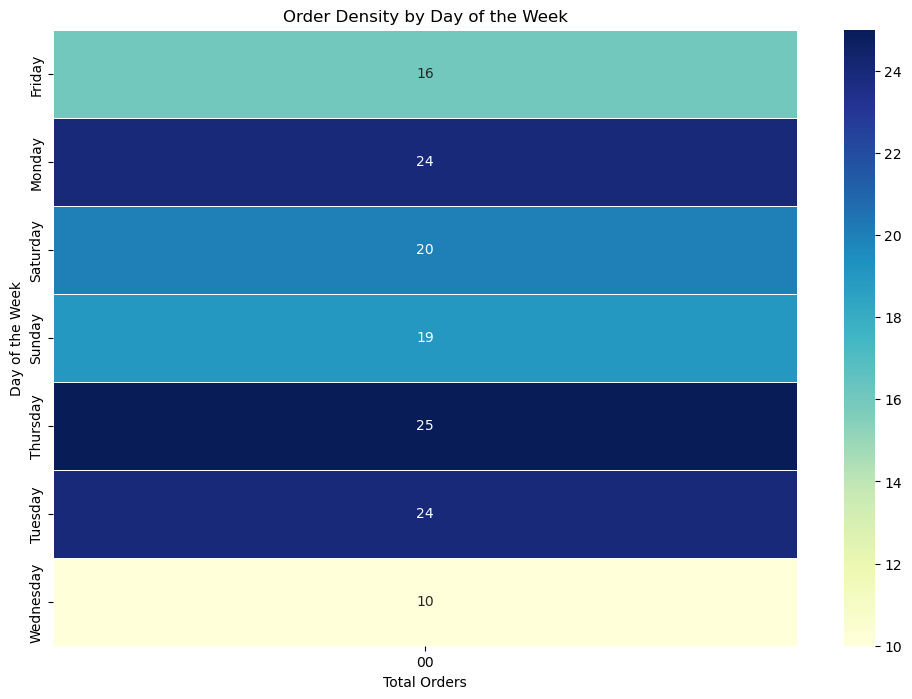

In [184]:
# Query for peak order times
query = """
    SELECT 
        STRFTIME('%H', order_date) AS order_hour,
        STRFTIME('%w', order_date) AS day_of_week,
        COUNT(*) AS total_orders
    FROM meesho_forward_reports
    GROUP BY order_hour, day_of_week;
"""
order_times = pd.read_sql(query, conn)
order_times['day_of_week'] = order_times['day_of_week'].replace({
    '0': 'Sunday', '1': 'Monday', '2': 'Tuesday', '3': 'Wednesday',
    '4': 'Thursday', '5': 'Friday', '6': 'Saturday'
})
print(order_times)
# Pivot for Heatmap
heatmap_data = order_times.pivot(index='day_of_week', columns='order_hour', values='total_orders')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title('Order Density by Day of the Week')
plt.xlabel('Total Orders')
plt.ylabel('Day of the Week')
plt.show()
